# Выбор локации для скважины

## Загрузка и подготовка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy import stats as st

'geo_data_0.csv'

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Дубликаты: 0


'geo_data_1.csv'

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Дубликаты: 0


'geo_data_2.csv'

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Дубликаты: 0


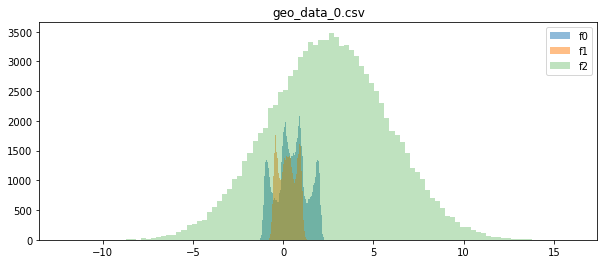

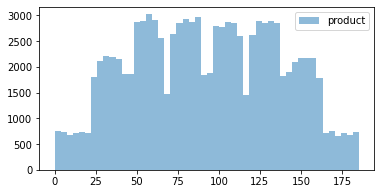

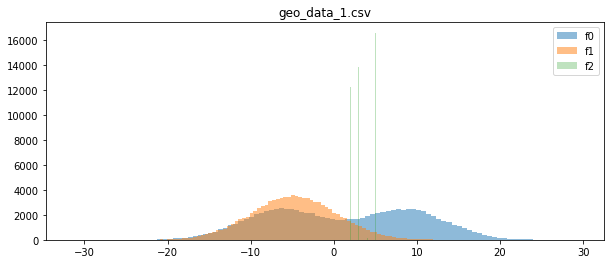

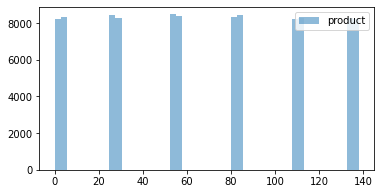

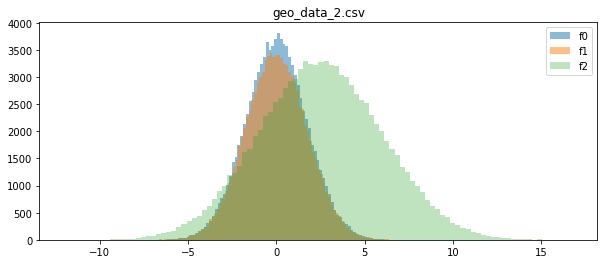

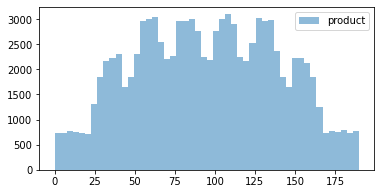

In [3]:
def init(dataset):
    display(dataset)
    data = pd.read_csv('https://code.s3.yandex.net/datasets/' + dataset)
    display(data.head())
    display(data.info())
    print('Дубликаты:', data.duplicated().sum())
    
    plt.figure(figsize=(10, 4))
    plt.hist(data['f0'], bins=100, alpha=0.5, label='f0')
    plt.hist(data['f1'], bins=100, alpha=0.5, label='f1')
    plt.hist(data['f2'], bins=100, alpha=0.3, label='f2')
    plt.legend(loc='upper right')
    plt.title(dataset)
    plt.figure(figsize=(6, 3))
    plt.hist(data['product'], bins=50, alpha=0.5, label='product')
    plt.legend(loc='upper right')
    
    return data

data_0 = init('geo_data_0.csv')
data_1 = init('geo_data_1.csv')
data_2 = init('geo_data_2.csv')


Для каждого из трёх регионов представлен датасет с пятью столбцами - `id` скважины, три характеристики и количество продукта в скважине. В данных нет дубликатов и пропусков. Во втором регионе есть странное распределение продукта и третьего признака - у многих скважин были одинаковые замеры.

Нужно построить модель, которая оценит объём запасов нефти в скважине. Целевой признак - столбец `product`. Для модели столбец с идентификатором скважины не нужен, удалю его.

In [3]:
data_0 = data_0.drop('id', axis=1)
data_1 = data_1.drop('id', axis=1)
data_2 = data_2.drop('id', axis=1)

data_2.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


Разделю данные каждого региона на обучающую и валидационную выборку. Размер обучающей выборки - 75% от данных.

In [4]:
feat_0 = data_0.drop('product', axis=1)
target_0 = data_0['product']
feat_1 = data_1.drop('product', axis=1)
target_1 = data_1['product']
feat_2 = data_2.drop('product', axis=1)
target_2 = data_2['product']

train_feat_0, valid_feat_0, train_target_0, valid_target_0 = train_test_split(feat_0, target_0, 
                                                                              train_size=0.75, random_state=1234)
train_feat_1, valid_feat_1, train_target_1, valid_target_1 = train_test_split(feat_1, target_1, 
                                                                              train_size=0.75, random_state=1234)
train_feat_2, valid_feat_2, train_target_2, valid_target_2 = train_test_split(feat_2, target_2, 
                                                                              train_size=0.75, random_state=1234)

print(len(train_feat_0), 'строк в обучающей,', len(valid_feat_0), 'строк в валидационной выборке')

75000 строк в обучающей, 25000 строк в валидационной выборке


## Обучение и проверка модели

Нужно предсказать количество продукта, значит, решается задача регрессии. Подходяща модель для этого - линейная регрессия. 

Обучу модель для каждого региона.

rmse: 37.562394183637785
среднее модели: 92.43045952558441
среднее ответов: 92.57965325518721


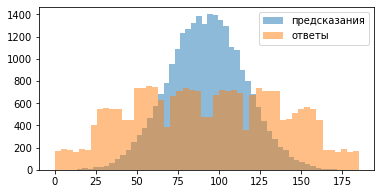

In [5]:
model_0 = LinearRegression()
model_0.fit(train_feat_0, train_target_0)
predict_0 = model_0.predict(valid_feat_0)
predict_0 = pd.Series(predict_0)

print('rmse:', mean_squared_error(valid_target_0, predict_0) ** 0.5)
print('среднее модели:', predict_0.mean())
print('среднее ответов:', valid_target_0.mean())

plt.figure(figsize=(6, 3))
plt.hist(predict_0, bins=50, alpha=0.5, label='предсказания')
plt.hist(valid_target_0, bins=50, alpha=0.5, label='ответы')
plt.legend(loc='upper right');

В первом регионе RMSE модели равна 37.5, это значит, что результат предсказания отличается от реального значения в среднем на 37.5 единиц. На графике предсказания и ответы распределены достаточно симметрично, но видно, что модель "неохотно" предсказывает очень большие и маленькие значения. Среднее предсказаний модели - 92.4, что немного меньше реального среднего.

rmse: 0.8939344738117703
среднее модели: 68.80248249798366
среднее ответов: 68.80279604178406


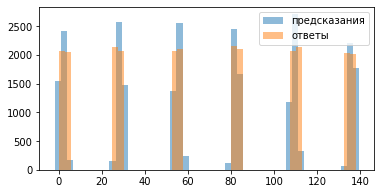

In [6]:
model_1 = LinearRegression()
model_1.fit(train_feat_1, train_target_1)
predict_1 = model_1.predict(valid_feat_1)
predict_1 = pd.Series(predict_1)

print('rmse:', mean_squared_error(valid_target_1, predict_1) ** 0.5)
print('среднее модели:', predict_1.mean())
print('среднее ответов:', valid_target_1.mean())

plt.figure(figsize=(6, 3))
plt.hist(predict_1, bins=50, alpha=0.5, label='предсказания')
plt.hist(valid_target_1, bins=50, alpha=0.5, label='ответы')
plt.legend(loc='upper right');

Во втором регионе RMSE резко отличается от первого - ошибка всего 0.89 единиц продукта! График ответов и предсказаний почти совпадает, также как и среднее.

rmse: 40.10318099258418
среднее модели: 94.91573817913459
среднее ответов: 94.97180046006052


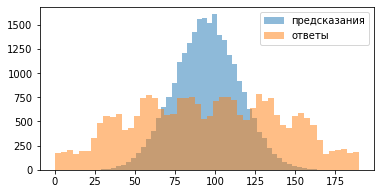

In [7]:
model_2 = LinearRegression()
model_2.fit(train_feat_2, train_target_2)
predict_2 = model_2.predict(valid_feat_2)
predict_2 = pd.Series(predict_2)

print('rmse:', mean_squared_error(valid_target_2, predict_2) ** 0.5)
print('среднее модели:', predict_2.mean())
print('среднее ответов:', valid_target_2.mean())
    
plt.figure(figsize=(6, 3))
plt.hist(predict_2, bins=50, alpha=0.5, label='предсказания')
plt.hist(valid_target_2, bins=50, alpha=0.5, label='ответы')
plt.legend(loc='upper right');
    

В третьем регионе ситуация та же, что в первом: ответы и предсказания распределены похоже, среднее почти одинаково, но модель плохо предсказывает крайние значения, отсюда RMSE в 40 единиц.

Самая высокая точность предсказаний у модели во втором регионе - RMSE равна 0.89. Метрики в первом и третьем регионах похожи - RMSE равна 37.5 и 40.1, среднее 92.4 и 94.9 соответственно. Среднее второго региона равно 68.8, что заметно ниже, чем в других.

## Подготовка к расчёту прибыли

Для расчёта прибыли нужны будут предсказания и ответы, записанные в переменных `predict_#` и `valid_target_#`, и значения из ячейки ниже:

In [8]:
price = 450000 # стоимость одной единицы продукта
budget = 10000000000 # бюджет на разработку одного региона
spots = 200 # количество скважин для разработки

In [9]:
budget_p_1 = budget / spots 
print('бюджет на одну скважину:', budget_p_1)
min_product = round(budget_p_1 / price, 2)
print('мин. кол-во продукта в скважине для безубытка:', min_product)

print('среднее продукта в регионе 0:', round(target_0.mean(), 2))
print('среднее продукта в регионе 1:', round(target_1.mean(), 2))
print('среднее продукта в регионе 2:', round(target_2.mean(), 2))

бюджет на одну скважину: 50000000.0
мин. кол-во продукта в скважине для безубытка: 111.11
среднее продукта в регионе 0: 92.5
среднее продукта в регионе 1: 68.83
среднее продукта в регионе 2: 95.0


Среднее во всех регионах меньше минимально необходимого для получения прибыли продукта. Но нам нужны не все, а только 200 самых прибыльных скважин - среднее кол-во продукта в них точно должно быть больше 111.

Чтобы посчитать прибыль в регионе, нужно отобрать скважины с самым большим запасом продукта, умножить его количество на стоимость и вычесть затраты на разработку. В ячейке ниже функция для расчёта прибыли. На вход она принимает списки с реальным количеством продукта и предсказанным, возвращает список с чистой прибылью.

In [10]:
def profit(target, predict):
    target = pd.Series(target).reset_index(drop=True)
    
    predict_sorted = predict.sort_values(ascending=False)
    selected = target[predict_sorted.index][:spots]
    
    return selected.sum() * price - budget

Проверю работу функции на одной выборке:

In [11]:
target = pd.Series(valid_target_0).reset_index(drop=True)
predict = pd.Series(predict_0).reset_index(drop=True)
subsample = predict.sample(n=500, replace=True, random_state=1234)

print('прибыль :', profit(target, subsample))

predict_sorted = subsample.sort_values(ascending=False)
selected = target[predict_sorted.index][:spots]

print('среднее продукта:', selected.mean())

прибыль : 633338085.184906
среднее продукта: 118.14820094649895


Несмотря на малое общее среднее, у выборки среднее больше необходимого, и прибыль положительная. Но для оценки прибыли в регионах недостаточно одной выборки - нужно посмотреть на распределение прибыли по многим выборкам.

## Расчёт прибыли и рисков 

Напишу функцию, которая проведёт процедуру бутстреп, собрав значения прибыли для 1000 выборок, после найдёт и выведет их среднюю прибыль, 95% доверительный интервал и процент убытков. Она принимает на вход реальное количество продукта в регионе и предсказанное.

In [12]:
def status(valid_target, predict):
    state = np.random.RandomState(1234)
    profits = []
    for i in range(1000):
        subsample = predict.sample(n=500, replace=True, random_state=state)
        profits.append(profit(valid_target, subsample))

    profits = pd.Series(profits)
    print('средняя прибыль:', round(profits.mean(), 2))

    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)
    print('95% интервал:', round(lower), '|', round(upper))
    
    losses = profits[profits <= 0]
    profits = profits[profits > 0]
    print('убытки:', round(losses.count() / profits.count() * 100, 2), '%')

    plt.figure(figsize=(8, 3))
    profits.plot(kind='hist', bins=50, label='прибыль');
    losses.plot(kind='hist', bins=20, label='убытки')
    plt.legend(loc='upper right');

Вызову функцию для первого региона:

средняя прибыль: 379402878.22
95% интервал: -107976792 | 918803442
убытки: 7.76 %


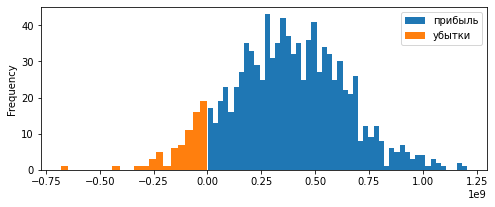

In [13]:
status(valid_target_0, predict_0)

Средняя прибыль в первом регионе - 379.4 млн. 95% значений прибыли лежат в интервале от -107.9 млн до 918.8 млн. Какая бы большая прибыль ни была, в этот интервал попали убытки. Всего убытки появляются в 7.76% случаев.

средняя прибыль: 429085147.91
95% интервал: 32450558 | 847355452
убытки: 1.94 %


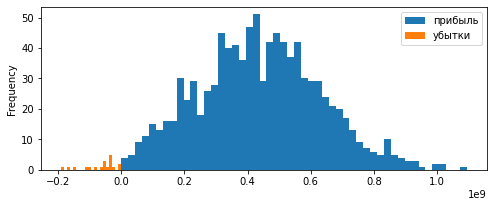

In [14]:
status(valid_target_1, predict_1)

Во втором регионе средняя прибыль равна 429 млн, 95% значений прибыли в пределах 32.4 млн и 847.3 млн, а риск убытков всего 1,94%.

средняя прибыль: 353931385.93
95% интервал: -210845231 | 892073818
убытки: 9.89 %


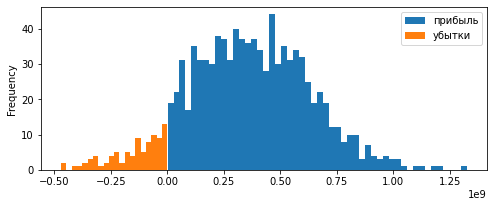

In [15]:
status(valid_target_2, predict_2)

В третьем регионе средняя прибыль самая маленькая - 353.9 млн, 95% значений в интервале от -210.8 млн до 892 млн. Риск убытков самымй большой - 9.89%

В итоге самая большая средняя прибыль во втором регионе, самая маленькая - в третьем. Несмотря на более высокое среднее количество продукта в первом и третьем регионах, убытки в них гораздо больше. В условии задачи было сказано, что для разработки подходят регионы, в которых вероятность убытков меньше 2.5%. При этом условии *только второй регион подходит для разработки* - вероятность убытков в нём 1.94%. Ожидаемая прибыль - 429 млн. руб..

Для выбора подходящего региона была проделана следующая работа:
- подготовлены данные: удалён ненужный признак, данные разделены на две выборки для обучения модели;
- обучены модели для каждого региона, проверено их качество;
- написана функция расчёта прибыли;
- найдено распределение прибыли для каждого региона;
- из распределения найдены средняя прибыль, риски и 95% доверительный интервал.